In [1]:
import torch
mps_device = torch.device("mps")

# Load Data

Found 6862 files belonging to 11 classes.
Using 5490 files for training.
Using 1372 files for validation.


2025-04-02 22:25:18.408067: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-02 22:25:19.094312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-02 22:25:19.945448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-02 22:25:21.442085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-02 22:25:22.241909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-02 22:25:23.062175: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-02 22:25:24.656602: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-02 22:25:25.317082: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-02 22:25:26.086384: W tensorflow/core/lib/png/png_io.cc:89] PNG 

Original class counts: {0: 559, 1: 678, 2: 379, 3: 514, 4: 485, 5: 296, 6: 397, 7: 189, 8: 932, 9: 549, 10: 512}


2025-04-02 22:25:57.065032: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-02 22:25:57.570102: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-02 22:25:58.446842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-02 22:26:00.334918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-02 22:26:01.184504: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


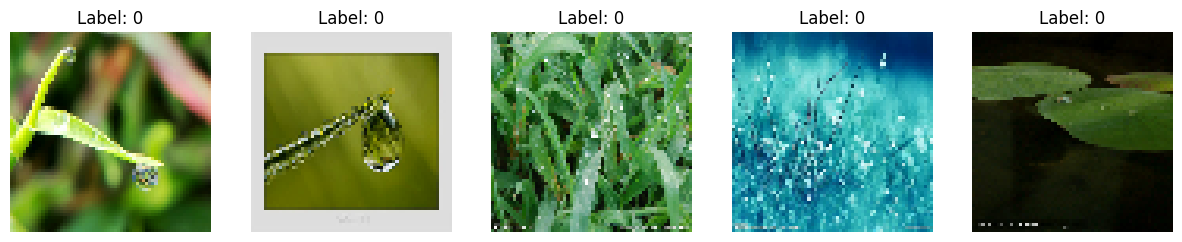

In [53]:
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt

# Dataset/hyperparams
sandbox_dir = pathlib.Path("../Data/Weather_Dataset")
batch_size = 8
image_size = (64, 64)  # do not change for resnet50

# Load dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    sandbox_dir,
    labels='inferred',
    label_mode='int',
    validation_split=0.2,
    subset="both",
    seed=1234,
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True
)

### USE THESE 
train_dataset, val_dataset = dataset  

# === Oversampling Preprocessing for the Training Dataset ===
# Unbatch the training dataset to work with individual samples
train_ds_unbatched = train_dataset.unbatch()

# Retrieve class names and determine number of classes
class_names = train_dataset.class_names
num_classes = len(class_names)

# Create a separate dataset for each class using filtering
class_datasets = {}
for i in range(num_classes):
    # Filter out samples that belong to class i
    class_datasets[i] = train_ds_unbatched.filter(lambda image, label: label == i)

# Count samples per class
counts = {}
for i in range(num_classes):
    counts[i] = class_datasets[i].reduce(0, lambda x, _: x + 1).numpy()
print("Original class counts:", counts)

# Determine the maximum count among all classes
max_count = max(counts.values())

# Oversample each class: repeat and take exactly max_count samples for each
oversampled_datasets = []
for i in range(num_classes):
    ds = class_datasets[i].repeat().take(max_count)
    oversampled_datasets.append(ds)

# Combine the oversampled datasets into one balanced dataset
balanced_train_ds = oversampled_datasets[0]
for ds in oversampled_datasets[1:]:
    balanced_train_ds = balanced_train_ds.concatenate(ds)

# Shuffle and batch the balanced training dataset
balanced_train_ds = balanced_train_ds.shuffle(buffer_size=1000).batch(batch_size)

# Optionally, replace train_dataset with the balanced version
train_dataset = balanced_train_ds

# === Display a few samples from the balanced training dataset ===
for images, labels in train_dataset.take(1):
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i in range(5):
        axes[i].imshow(images[i].numpy().astype("uint8"))
        axes[i].axis("off")
        axes[i].set_title(f"Label: {labels[i].numpy()}")
    plt.show()
    break

In [50]:
# Get X_val and y_val, normalize
X_train, y_train = [], []
for images, labels in train_dataset:
    X_train.append((images.numpy() / 255.0))
    y_train.append(labels.numpy())
X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

X_val, y_val = [], []
for images, labels in val_dataset:
    X_val.append((images.numpy() / 255.0))
    y_val.append(labels.numpy())
X_val = np.concatenate(X_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

2025-04-02 22:21:10.325113: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-02 22:21:11.086375: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-02 22:21:11.796708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-02 22:21:13.154540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-02 22:21:13.825844: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-02 22:21:15.138723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-02 22:21:15.566150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-02 22:21:16.291455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-04-02 22:21:17.808087: W tensorflow/core/lib/png/png_io.cc:89] PNG 

(10252, 64, 64, 3)
(10252,)
(1372, 64, 64, 3)
(1372,)


2025-04-02 22:22:31.937767: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [52]:
y_val_one_hot = to_categorical(y_val, num_classes=num_classes)
print(y_val_one_hot.shape)

(1372, 11)


In [30]:
print(len(train_dataset))

1282


# Data Augmentation

In [56]:
# # Get X_train and y_train data
# X_train = []
# y_train = []
# for images, labels in train_dataset:
#     X_train.append(images.numpy())
#     y_train.append(labels.numpy())
# X_train = np.concatenate(X_train, axis=0)
# y_train = np.concatenate(y_train, axis=0)

# # Augment training images
# datagen = ImageDataGenerator(
#     rotation_range=10,
#     brightness_range=[0.8, 1.2],
#     zoom_range=0.1,
#     horizontal_flip=True
# )
# datagen.fit(X_train)

# # Append augmented data to X_train and y_train
# augmented_data = datagen.flow(X_train, y_train, batch_size=32)
# augmented_X_train = []
# augmented_y_train = []
# for i in range(len(X_train) // 32):  # Adjust the range as needed
#     batch_X, batch_y = next(augmented_data)
#     augmented_X_train.append(batch_X)
#     augmented_y_train.append(batch_y)
# augmented_X_train = np.concatenate(augmented_X_train, axis=0)
# augmented_y_train = np.concatenate(augmented_y_train, axis=0)

# # Normalize X_train and X_train combine
# X_train_summed = X_train.sum(axis=3) / 255.0
# augmented_X_train_summed = augmented_X_train.sum(axis=3) / 255.0

# # Combine original and augmented data 
# X_train_combined = np.concatenate((X_train, augmented_X_train), axis=0)
# y_train_combined = np.concatenate((y_train, augmented_y_train), axis=0)

# print(X_train_combined.shape)
# print(y_train_combined.shape)


2025-03-05 21:02:37.784059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-03-05 21:02:38.960652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-03-05 21:02:41.490961: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-03-05 21:02:44.062738: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


(10962, 224, 224, 3)
(10962,)


# PCA

Number of principal components explaining 95% of variance: 922


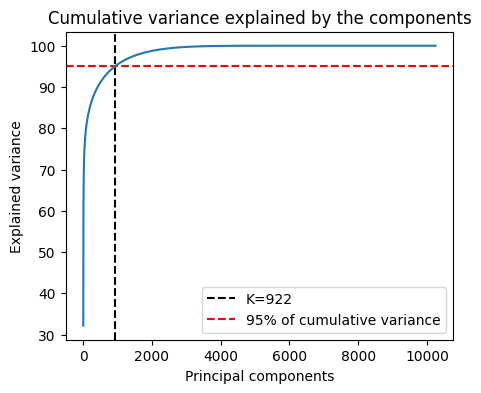

In [54]:
# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)  
X_val_flat = X_val.reshape(X_val.shape[0], -1)  

# Create instance of PCA and fit
pca = PCA()
pca.fit_transform(X_train_flat)

# Find cumulative variance
var_cum = np.cumsum(pca.explained_variance_ratio_) * 100

# How many principal components explain 95% of the variance?
k = np.argmax(var_cum > 95) + 1  # +1 because np.argmax returns the first index where condition is met
print("Number of principal components explaining 95% of variance: " + str(k))

# Plot cumulative variance
plt.figure(figsize=[5, 4])
plt.title('Cumulative variance explained by the components')
plt.ylabel('Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--", label=f"K={k}")
plt.axhline(y=95, color="r", linestyle="--", label="95% of cumulative variance")
plt.plot(var_cum)
plt.legend()
plt.show()

In [55]:
# re run PCA using chosen k = 972 for compatability with vgg16 (18 x 18 = 324 * 3 = 972)
pca = PCA(n_components=972) 
X_train = pca.fit_transform(X_train_flat)
X_val = pca.transform(X_val_flat)

# Get principal components
principal_Df = pd.DataFrame(data = X_train,)
principal_Df['Label'] = y_train
print(principal_Df.head())

# Variance of principal components
print('Explained Variation per Principal Component: {}'.format(pca.explained_variance_ratio_))


           0         1          2         3         4         5          6  \
0   8.300182  0.147951 -19.286165  3.558350  0.486732  1.974026  10.739263   
1 -14.532373  2.176397   8.370423 -5.661648  5.962901  2.340312   6.210524   
2 -15.079222  1.705235  -6.946208  4.416498  2.828641  0.804590  11.209397   
3 -32.465393  2.215166  -6.638110  4.278831  2.680688  5.721960  14.568519   
4  -8.441433  5.209882 -14.765546  9.525092  1.532858  1.222556   0.510537   

          7         8         9  ...       963       964       965       966  \
0  2.887668 -2.135979 -1.327208  ... -0.068215  0.128341  0.020917  0.114550   
1  0.800709 -1.778557 -2.286617  ... -0.324432 -0.347397  0.337233  0.360822   
2 -0.585791 -1.466662  1.618103  ...  0.386231 -0.261476 -0.087411 -0.190417   
3 -0.618913 -1.831295  0.431257  ...  0.037842 -0.148588  0.029255 -0.159898   
4  2.486866  0.784697 -0.078975  ...  0.122753  0.416988 -0.007261  0.430033   

        967       968       969       970       97

In [56]:
print(f"Before PCA X_train.shape: {X_train_flat.shape}")
print(f"After PCA X_train.shape: {X_train.shape}")

Before PCA X_train.shape: (10252, 12288)
After PCA X_train.shape: (10252, 972)


In [57]:
from tensorflow.image import resize

# Reshape images to (18,18) since 18*18= 324*3 = 972 (number of principal components/features)
img_rows, img_cols=18,18

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3) 
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 3) 
y_train = y_train.reshape(y_train.shape[0], 1)
y_val = y_val.reshape(y_val.shape[0], 1)

print(X_train.shape)
print(y_train.shape)

(10252, 18, 18, 3)
(10252, 1)


# CNN

In [36]:

from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam


tf.keras.backend.clear_session()
tf.random.set_seed(0)

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(18, 18, 3)), # kernel_regularizer=regularizers.l2(0.01)),  # Adjust input_shape
    BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.3),
    
    layers.Conv2D(64, (3, 3), activation='relu'), # kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu'), # kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    # layers.MaxPooling2D(2, 2),
    layers.Dropout(0.3),
    

    layers.Flatten(), # Flatten the output before the dense layer
    layers.Dense(128, activation='relu'),# kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(11, activation='softmax')  # Adjust the number of units to match the number of classes
])
        
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
model_history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

/Users/belladavies/.julia/conda/3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.2210 - loss: 2.5892 - val_accuracy: 0.0941 - val_loss: 2.9397
Epoch 2/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.3304 - loss: 1.8971 - val_accuracy: 0.1355 - val_loss: 3.1644
Epoch 3/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3930 - loss: 1.6751 - val_accuracy: 0.1863 - val_loss: 3.2426
Epoch 4/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4231 - loss: 1.5830 - val_accuracy: 0.2277 - val_loss: 3.3051
Epoch 5/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4512 - loss: 1.5113 - val_accuracy: 0.2292 - val_loss: 3.4696
Epoch 6/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4749 - loss: 1.4556 - val_accuracy: 0.2472 - val_loss: 3.6040
Epoch 7/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4856 - loss: 1.4161 - val_accuracy: 0.2560 - val_loss: 3.7379
Epoch 8/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5006 - loss: 1.3772 - val_accu

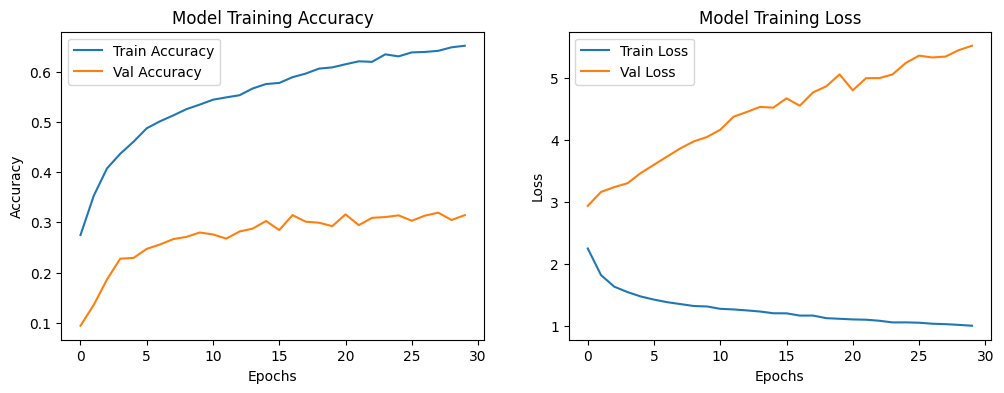

In [37]:
history = model_history.history
# Plot training results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'], label='Train Loss')
plt.plot(model_history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Training Loss')

plt.show()

# Model Evaluation

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


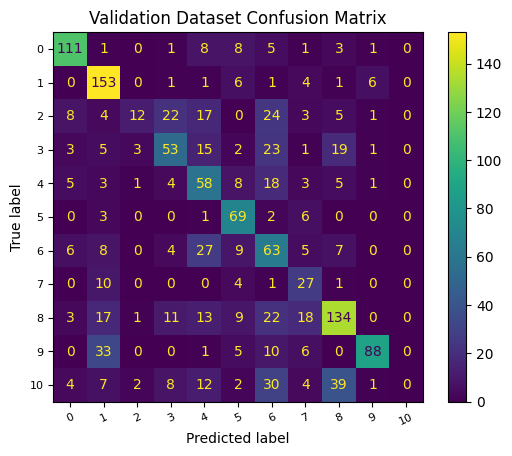

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
Y_val_pred = model.predict(x=X_val)
# Get the class with the highest probability for each sample
Y_val_pred_classes = np.argmax(Y_val_pred, axis=1)
conf_matrix=confusion_matrix(y_val, Y_val_pred_classes)
# Plot confusion matrix
display = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y_val))
display.plot()
plt.title("Validation Dataset Confusion Matrix")
plt.yticks(fontsize=8)
plt.xticks(fontsize=8, rotation=25)
plt.show()

In [39]:
print(classification_report(y_val, Y_val_pred_classes, target_names=[str(label) for label in np.unique(y_val)]))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       139
           1       0.63      0.88      0.73       173
           2       0.63      0.12      0.21        96
           3       0.51      0.42      0.46       125
           4       0.38      0.55      0.45       106
           5       0.57      0.85      0.68        81
           6       0.32      0.49      0.38       129
           7       0.35      0.63      0.45        43
           8       0.63      0.59      0.61       228
           9       0.89      0.62      0.73       143
          10       0.00      0.00      0.00       109

    accuracy                           0.56      1372
   macro avg       0.52      0.54      0.50      1372
weighted avg       0.55      0.56      0.53      1372



/Users/belladavies/.julia/conda/3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/belladavies/.julia/conda/3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/belladavies/.julia/conda/3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

## Hyperparameter Tuning

In [60]:
import tensorflow as tf
import keras_tuner as kt
import pathlib
import matplotlib.pyplot as plt

num_classes = 11

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = tf.keras.Sequential([
        # Input layer
        tf.keras.layers.InputLayer(input_shape=(18,18) + (3,)),
        
        # First convolutional block
        tf.keras.layers.Conv2D(
            filters=hp.Int("conv_1_filters", min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice("conv_1_kernel", values=[3, 5]),
            activation="relu",
            padding="same"
        ),
        tf.keras.layers.MaxPooling2D(),
        
        # Second convolutional block
        tf.keras.layers.Conv2D(
            filters=hp.Int("conv_2_filters", min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice("conv_2_kernel", values=[3, 5]),
            activation="relu",
            padding="same"
        ),
        tf.keras.layers.MaxPooling2D(),
        
        # Flatten and Dense layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(
            units=hp.Int("dense_units", min_value=64, max_value=512, step=64),
            activation="relu"
        ),
        tf.keras.layers.Dense(num_classes, activation="softmax")
    ])

    # Compile the model using a tunable learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
        ),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Set up the Keras Tuner with Hyperband search
tuner = kt.Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=10,
    factor=3,
    directory="keras_tuner_dir",
    project_name="weather_cnn"
)

# Optional: early stopping callback to prevent overfitting
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

# Run the hyperparameter search using X_train and y_train
tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    callbacks=[stop_early]
)

# Retrieve the best hyperparameters found
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("The best hyperparameters are:")
print(f"conv_1_filters: {best_hps.get('conv_1_filters')}")
print(f"conv_1_kernel: {best_hps.get('conv_1_kernel')}")
print(f"conv_2_filters: {best_hps.get('conv_2_filters')}")
print(f"conv_2_kernel: {best_hps.get('conv_2_kernel')}")
print(f"dense_units: {best_hps.get('dense_units')}")
print(f"learning_rate: {best_hps.get('learning_rate')}")

Trial 26 Complete [00h 00m 30s]
val_accuracy: 0.6377550959587097

Best val_accuracy So Far: 0.6639941930770874
Total elapsed time: 01h 24m 19s
The best hyperparameters are:
conv_1_filters: 96
conv_1_kernel: 5
conv_2_filters: 96
conv_2_kernel: 5
dense_units: 192
learning_rate: 0.001


Epoch 1/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.4570 - loss: 1.5760 - val_accuracy: 0.6188 - val_loss: 1.1532
Epoch 2/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.6904 - loss: 0.9142 - val_accuracy: 0.6501 - val_loss: 1.1471
Epoch 3/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.8193 - loss: 0.5695 - val_accuracy: 0.6516 - val_loss: 1.2555
Epoch 4/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.8998 - loss: 0.3151 - val_accuracy: 0.6378 - val_loss: 1.5295
Epoch 5/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9356 - loss: 0.2012 - val_accuracy: 0.6378 - val_loss: 1.7198
Epoch 6/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.9562 - loss: 0.1423 - val_accuracy: 0.6713 - val_loss: 1.7690
Epoch 7/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.9721 - loss: 0.0885 - val_accuracy: 0.6647 - val_loss: 2.1156
Epoch 8/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9739 - loss: 0.0839 - 

Text(0.5, 1.0, 'Model Training Loss')

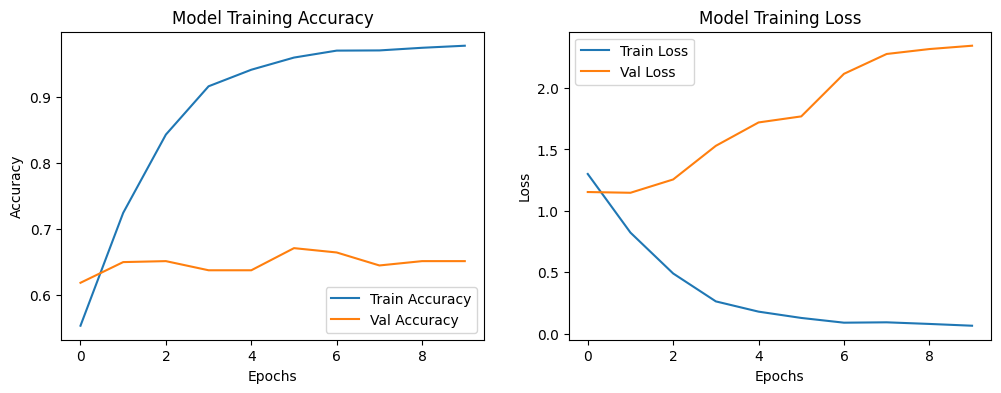

In [66]:
# Rebuild the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=10)

# Visualize the training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Training Loss')

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


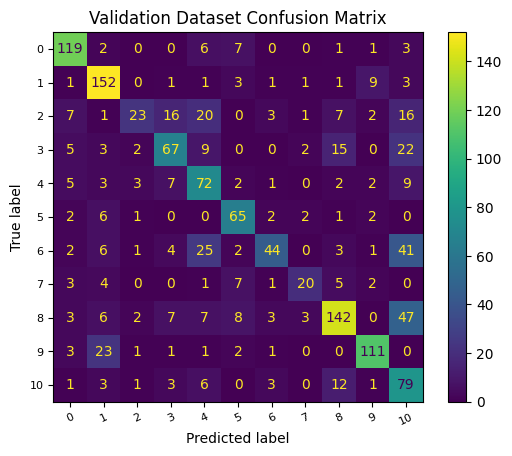

In [67]:
Y_val_pred = model.predict(x=X_val)
# Get the class with the highest probability for each sample
Y_val_pred_classes = np.argmax(Y_val_pred, axis=1)
conf_matrix=confusion_matrix(y_val, Y_val_pred_classes)
# Plot confusion matrix
display = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y_val))
display.plot()
plt.title("Validation Dataset Confusion Matrix")
plt.yticks(fontsize=8)
plt.xticks(fontsize=8, rotation=25)
plt.show()

In [68]:
print(classification_report(y_val, Y_val_pred_classes, target_names=[str(label) for label in np.unique(y_val)]))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       139
           1       0.73      0.88      0.80       173
           2       0.68      0.24      0.35        96
           3       0.63      0.54      0.58       125
           4       0.49      0.68      0.57       106
           5       0.68      0.80      0.73        81
           6       0.75      0.34      0.47       129
           7       0.69      0.47      0.56        43
           8       0.75      0.62      0.68       228
           9       0.85      0.78      0.81       143
          10       0.36      0.72      0.48       109

    accuracy                           0.65      1372
   macro avg       0.67      0.63      0.62      1372
weighted avg       0.69      0.65      0.65      1372

